## Import Required Libraries

In [61]:
import sys
from pathlib import Path

try:
    import matplotlib.pyplot as plt
except ImportError as e:
    print(f"Error: Matplotlib not found: {e}")
    sys.exit(1)

print("✓ All libraries imported successfully")

✓ All libraries imported successfully


## Load Predictions and Truth Files

In [62]:
def load_labels(filepath: str) -> list:
    """
    Load labels from a text file (one label per line).
    """
    path = Path(filepath)
    if not path.exists():
        raise FileNotFoundError(f"File not found: {filepath}")
    
    with open(path, 'r') as f:
        labels = [line.strip() for line in f.readlines() if line.strip()]
    return labels

In [63]:
predictions_file = 'predictions.txt'
truth_file = 'truth.txt'

try:
    predictions = load_labels(predictions_file)
    truth = load_labels(truth_file)
    print(f"✓ Loaded {len(predictions)} predictions and {len(truth)} truth labels")
except FileNotFoundError as e:
    print(f"✗ Error: {e}")
    print("Note: You need predictions.txt and truth.txt files in the same directory")

✓ Loaded 100 predictions and 100 truth labels


## What is a Confusion Matrix?

A confusion matrix shows how many predictions were correct/incorrect:

```
                  Predicted
              Jedi      Sith
Actual Jedi    TP        FN
       Sith    FP        TN
```

- **TP (True Positive)**: Predicted Jedi, was actually Jedi ✓
- **TN (True Negative)**: Predicted Sith, was actually Sith ✓
- **FP (False Positive)**: Predicted Jedi, was actually Sith ✗
- **FN (False Negative)**: Predicted Sith, was actually Jedi ✗

## Calculate Confusion Matrix (Manual)

In [64]:
def calculate_confusion_matrix(y_true: list, y_pred: list, classes: list) -> list:
    """
    Calculate confusion matrix manually.
    
    Args:
        y_true: Actual labels
        y_pred: Predicted labels
        classes: List of class names [positive, negative]
        
    Returns:
        2x2 confusion matrix as nested list
    """
    if len(y_true) != len(y_pred):
        raise ValueError("Length of truth and predictions must match")
    
    matrix = [[0, 0], [0, 0]]
    
    for true, pred in zip(y_true, y_pred):
        true_idx = classes.index(true)
        pred_idx = classes.index(pred)
        matrix[true_idx][pred_idx] += 1
    
    return matrix

In [65]:
classes = ['Jedi', 'Sith']
cm = calculate_confusion_matrix(truth, predictions, classes)

print("Confusion Matrix:")
print(f"[{cm[0]}")
print(f" {cm[1]}]")

Confusion Matrix:
[[33, 18]
 [17, 32]]


## Calculate Metrics (Manual)

**Formulas:**
- **Precision** = TP / (TP + FP) — "Of all predicted positive, how many were correct?"
- **Recall** = TP / (TP + FN) — "Of all actual positive, how many did we find?"
- **F1-Score** = 2 × (Precision × Recall) / (Precision + Recall) — Harmonic mean
- **Accuracy** = (TP + TN) / Total — "Overall correctness"

In [66]:
def calculate_metrics(cm: list, classes: list) -> dict:
    """
    Calculate precision, recall, f1-score from confusion matrix.
    
    Args:
        cm: 2x2 confusion matrix
        classes: List of class names
        
    Returns:
        Dictionary with metrics for each class
    """
    metrics = {}
    total = sum(sum(row) for row in cm)
    correct = cm[0][0] + cm[1][1]
    
    for i, cls in enumerate(classes):
        tp = cm[i][i]
        fp = sum(cm[j][i] for j in range(len(classes))) - tp
        fn = sum(cm[i]) - tp
        support = sum(cm[i])
        
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        
        metrics[cls] = {
            'precision': precision,
            'recall': recall,
            'f1-score': f1,
            'support': support
        }
    
    metrics['accuracy'] = correct / total if total > 0 else 0
    metrics['total'] = total
    
    return metrics

In [67]:
metrics = calculate_metrics(cm, classes)

print(f"{'':>12} {'precision':>10} {'recall':>10} {'f1-score':>10} {'total':>10}")
print()
for cls in classes:
    m = metrics[cls]
    print(f"{cls:>12} {m['precision']:>10.2f} {m['recall']:>10.2f} {m['f1-score']:>10.2f} {m['support']:>10}")
print()
print(f"{'accuracy':>12} {metrics['accuracy']:>32.2f} {metrics['total']:>10}")

              precision     recall   f1-score      total

        Jedi       0.66       0.65       0.65         51
        Sith       0.64       0.65       0.65         49

    accuracy                             0.65        100


## Display Confusion Matrix

In [68]:
def display_confusion_matrix(cm: list, classes: list, title: str = 'Confusion Matrix'):
    """
    Display confusion matrix as a heatmap with 4 distinct colors.
    """
    import numpy as np
    from matplotlib.colors import LinearSegmentedColormap
    
    colors = ['#2d6a4f', '#40916c', '#ffd166', '#9b5de5']
    custom_cmap = LinearSegmentedColormap.from_list('custom', colors, N=256)
    
    fig, ax = plt.subplots(figsize=(8, 6))
    
    im = ax.imshow(cm, cmap=custom_cmap)
    
    ax.set_xticks(range(len(classes)))
    ax.set_yticks(range(len(classes)))
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)
    
    ax.set_xlabel('Predicted', fontsize=12)
    ax.set_ylabel('Actual', fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')
    
    for i in range(len(classes)):
        for j in range(len(classes)):
            text = ax.text(j, i, cm[i][j], ha='center', va='center', 
                          fontsize=20, fontweight='bold',
                          color='white')
    
    plt.colorbar(im)
    plt.tight_layout()
    plt.show()

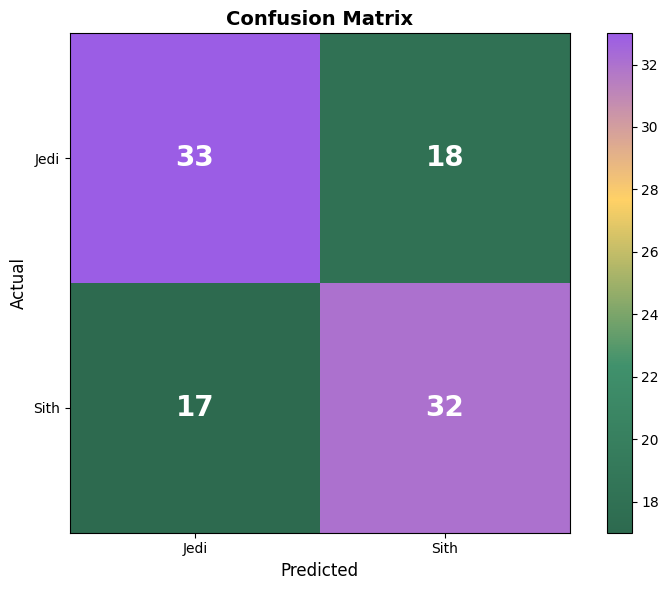

In [69]:
display_confusion_matrix(cm, classes)

## Print Final Output (Exercise Format)

In [70]:
print(f"{'':>12} {'precision':>10} {'recall':>10} {'f1-score':>10} {'total':>10}")
print()
for cls in classes:
    m = metrics[cls]
    print(f"{cls:>12} {m['precision']:>10.2f} {m['recall']:>10.2f} {m['f1-score']:>10.2f} {m['support']:>10}")
print()
print(f"{'accuracy':>12} {metrics['accuracy']:>32.2f} {metrics['total']:>10}")
print()
print(f"[[{cm[0][0]} {cm[0][1]}]")
print(f" [{cm[1][0]} {cm[1][1]}]]")

              precision     recall   f1-score      total

        Jedi       0.66       0.65       0.65         51
        Sith       0.64       0.65       0.65         49

    accuracy                             0.65        100

[[33 18]
 [17 32]]


## Summary

✓ **Completed Exercise 00: Confusion Matrix**

### What We Calculated (Manually):
- **Confusion Matrix**: Counts of TP, TN, FP, FN
- **Precision**: How accurate are positive predictions?
- **Recall**: How many positives did we find?
- **F1-Score**: Balance between precision and recall
- **Accuracy**: Overall correctness

### Key Insight:
The confusion matrix is the foundation for evaluating classification models!